In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!ls "/content/drive/MyDrive/Bitcoin_Sentiment_Project/"


fear_greed_index.csv  historical_data.csv


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:


fg = pd.read_csv('/content/drive/MyDrive/Bitcoin_Sentiment_Project/fear_greed_index.csv')


print("Fear & Greed Index:")
display(fg.head())




Fear & Greed Index:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
hd = pd.read_csv('/content/drive/MyDrive/Bitcoin_Sentiment_Project/historical_data.csv')
print("\nHistorical Data:")
display(hd.head())



Historical Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
print(f"\nFG Shape: {fg.shape}, HD Shape: {hd.shape}")


FG Shape: (2644, 4), HD Shape: (211224, 16)


In [14]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [16]:
fg.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [17]:
#Checking for Null Values.
fg.isnull().any()

,0
timestamp,False
value,False
classification,False
date,False


In [18]:
fg.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [15]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [19]:
hd.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,dt
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,79225
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,2025-05-01 09:10:16.361502208
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,2023-01-05 01:06:00
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,2025-02-02 13:02:00
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,2025-06-02 19:46:00
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,2025-10-01 03:49:00
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,2025-12-04 23:55:00
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,NaN


In [22]:
#Checking for Null Values.
hd.isnull().any()

,0
Account,False
Coin,False
Execution Price,False
Size Tokens,False
Size USD,False
Side,False
Timestamp IST,False
Start Position,False
Direction,False
Closed PnL,False


In [23]:
hd.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [24]:
hd['Timestamp IST'].head(10)


,Timestamp IST
0,02-12-2024 22:50
1,02-12-2024 22:50
2,02-12-2024 22:50
3,02-12-2024 22:50
4,02-12-2024 22:50
5,02-12-2024 22:50
6,02-12-2024 22:50
7,02-12-2024 22:50
8,02-12-2024 22:50
9,02-12-2024 22:50


In [25]:
# Convert with explicit date format
hd['dt'] = pd.to_datetime(hd['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract just the date part
hd['trade_date'] = hd['dt'].dt.date

# Check null counts again
print("Null values after proper conversion:")
print(hd[['dt', 'trade_date']].isnull().sum())

# Preview a few converted dates
hd[['Timestamp IST', 'dt', 'trade_date']].head()


Null values after proper conversion:
dt            0
trade_date    0
dtype: int64


,Timestamp IST,dt,trade_date
0,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
1,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
2,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
3,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
4,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02


In [26]:
merged = pd.merge(hd, fg, left_on='trade_date', right_on='date', how='left')
print("Merged dataset shape:", merged.shape)
merged.head()



Merged dataset shape: (211224, 22)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,dt,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [27]:
# Check nulls
merged.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [28]:
merged = merged.dropna(subset=['value', 'classification'])
print("After dropping missing sentiment rows:", merged.shape)


After dropping missing sentiment rows: (211218, 22)


In [29]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,dt,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [31]:
merged.corr

<bound method DataFrame.corr of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size USD  Side     Timestamp IST  Start Position  \
0            986.87   7872.16   BUY  02-12-2024 22:50        0.000000   
1             16.00    127.68   BUY  02-12-2024 22:50      986.524596   
2            144.09   1150.63   BUY  02-12-2024 22:50     1002.518996   
3            142.98   1142.04   BUY  02-12-2024 22:50     1146.558564   
4              8.73     69.75   BUY  02-12-2024 22:50     1289.488521   
...             ...       ...   ...               ...             ...   
211219       382.20    420.80  SELL  25-04-2025 15:35     7546.600000   
211220      2124.10   2338.63  SELL  25-04-2025 15:35     7164.400000   
211221       423.40    466.16  SELL  25-04-2025 15:35     5040.300000   
211222      3599.80   3963.38  SELL  25-04-2025 15:35     4616.900000   
211223      1017.10   1119.83  SELL  25-04-2025 15:35     1017.100000   

         Direction  Closed PnL  ... Crossed       Fee      Trade ID  \
0              Buy      0.0000  ...    True  0.345404  8.950000e+14   
1              Buy      0.0000  ...    True  0.005600  4.430000e+14   
2              Buy      0.0000  ...    True  0.050431  6.600000e+14   
3              Buy      0.0000  ...    True  0.050043  1.080000e+15   
4              Buy      0.0000  ...    True  0.003055  1.050000e+15   
...            ...         ...  ...     ...       ...           ...   
211219  Close Long    -20.2566  ...   False  0.042080  1.990000e+14   
211220  Close Long   -112.5773  ...   False  0.233863  9.260000e+14   
211221  Close Long    -22.4402  ...   False  0.046616  6.930000e+14   
211222  Close Long   -190.7894  ...   False  0.396337  4.180000e+14   
211223  Close Long    -53.9063  ...   False  0.111982  3.270000e+14   

           Timestamp                  dt  trade_date     timestamp value  \
0       1.730000e+12 2024-12-02 22:50:00  2024-12-02  1.733117e+09  80.0   
1       1.730000e+12 2024-12-02 22:50:00  2024-12-02  1.733117e+09  80.0   
2       1.730000e+12 2024-12-02 22:50:00  2024-12-02  1.733117e+09  80.0   
3       1.730000e+12 2024-12-02 22:50:00  2024-12-02  1.733117e+09  80.0   
4       1.730000e+12 2024-12-02 22:50:00  2024-12-02  1.733117e+09  80.0   
...              ...                 ...         ...           ...   ...   
211219  1.750000e+12 2025-04-25 15:35:00  2025-04-25  1.745559e+09  60.0   
211220  1.750000e+12 2025-04-25 15:35:00  2025-04-25  1.745559e+09  60.0   
211221  1.750000e+12 2025-04-25 15:35:00  2025-04-25  1.745559e+09  60.0   
211222  1.750000e+12 2025-04-25 15:35:00  2025-04-25  1.745559e+09  60.0   
211223  1.750000e+12 2025-04-25 15:35:00  2025-04-25  1.745559e+09  60.0   

        classification        date  
0        Extreme Greed  2024-12-02  
1        Extreme Greed  2024-12-02  
2        Extreme Greed  2024-12-02  
3        Extreme Greed  2024-12-02  
4        Extreme Greed  2024-12-02  
...                ...         ...  
211219           Greed  2025-04-25  
211220           Greed  2025-04-25  
211221           Gr

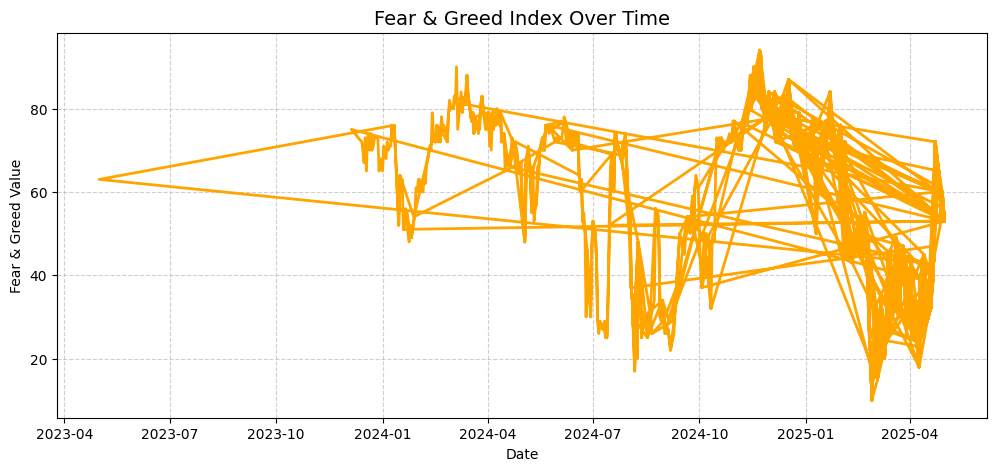

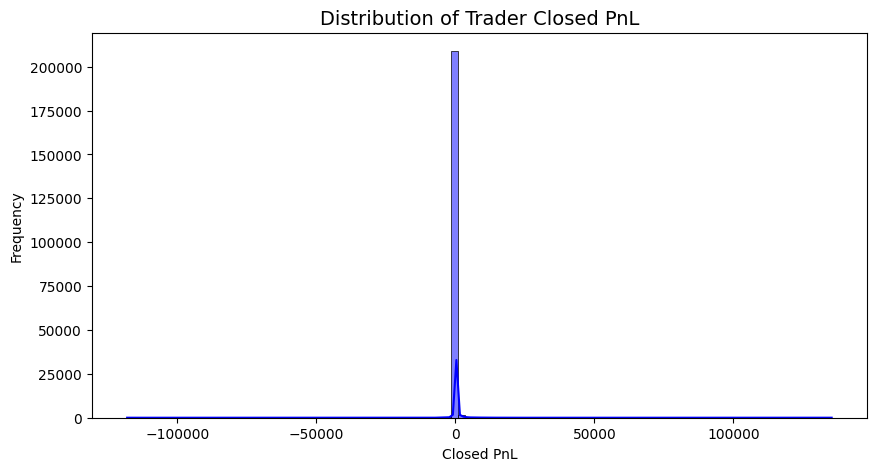

Detected 48942 outliers out of 211218 total records
Remaining after filtering: 162276


In [32]:
# 3️⃣ Data Visualization & Outlier Detection

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fear & Greed Index trend
plt.figure(figsize=(12,5))
plt.plot(merged['date'], merged['value'], color='orange', linewidth=2)
plt.title('Fear & Greed Index Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Fear & Greed Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Trader PnL Distribution
plt.figure(figsize=(10,5))
sns.histplot(merged['Closed PnL'], bins=100, kde=True, color='blue')
plt.title('Distribution of Trader Closed PnL', fontsize=14)
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.show()

# 3. Outlier Detection using IQR
Q1 = merged['Closed PnL'].quantile(0.25)
Q3 = merged['Closed PnL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = merged[(merged['Closed PnL'] < lower_bound) | (merged['Closed PnL'] > upper_bound)]
print(f"Detected {outliers.shape[0]} outliers out of {merged.shape[0]} total records")

# Filtered data
merged_filtered = merged[(merged['Closed PnL'] >= lower_bound) & (merged['Closed PnL'] <= upper_bound)]
print(f"Remaining after filtering: {merged_filtered.shape[0]}")


In [33]:
# 4️⃣ Feature Engineering

# Create win indicator (1 if trade is profitable)
merged_filtered['win'] = (merged_filtered['Closed PnL'] > 0).astype(int)

# Calculate percentage return relative to trade size
merged_filtered['return_pct'] = merged_filtered['Closed PnL'] / (merged_filtered['Size USD'] + 1e-9) * 100

# Create sentiment buckets
merged_filtered['sentiment_bucket'] = pd.cut(
    merged_filtered['value'],
    bins=[0,20,40,60,80,100],
    labels=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
)

# Encode categorical variables (Side, Coin)
merged_encoded = pd.get_dummies(merged_filtered, columns=['Side','Coin'], drop_first=True)

print("✅ Feature Engineering complete.")
print(merged_encoded[['Closed PnL','win','return_pct','value','sentiment_bucket']].head())


✅ Feature Engineering complete.
   Closed PnL  win  return_pct  value sentiment_bucket
0         0.0    0         0.0   80.0            Greed
1         0.0    0         0.0   80.0            Greed
2         0.0    0         0.0   80.0            Greed
3         0.0    0         0.0   80.0            Greed
4         0.0    0         0.0   80.0            Greed


In [34]:
# 5️⃣ Splitting Data (Independent vs Dependent)

# Dependent variable: whether a trade was profitable (win/loss)
y = merged_encoded['win']

# Select relevant independent variables for the model
X = merged_encoded[['value', 'Size USD', 'Fee', 'Start Position']].copy()

print("✅ Data split complete.")
print("Independent variable shape:", X.shape)
print("Dependent variable shape:", y.shape)


✅ Data split complete.
Independent variable shape: (162276, 4)
Dependent variable shape: (162276,)


In [35]:
# 6️⃣ Feature Scaling and Train/Test Split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print("✅ Scaling and splitting complete.")


Training samples: 129820, Testing samples: 32456
✅ Scaling and splitting complete.


✅ Model Accuracy: 77.02%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86     23027
           1       0.83      0.26      0.40      9429

    accuracy                           0.77     32456
   macro avg       0.80      0.62      0.63     32456
weighted avg       0.78      0.77      0.72     32456



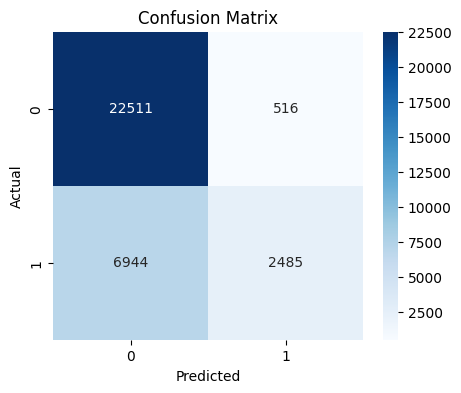

In [36]:
# 7️⃣ Model Building (Random Forest Classifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc*100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [37]:
# Logistic Regression Baseline Model

from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
acc_log = accuracy_score(y_test, y_pred_log)
print(f"⚖️ Logistic Regression Accuracy: {acc_log*100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Compare both model accuracies
print(f"\n🔍 Random Forest Accuracy: {acc*100:.2f}%")
print(f"🔍 Logistic Regression Accuracy: {acc_log*100:.2f}%")

if acc > acc_log:
    print("✅ Random Forest performs better, capturing non-linear patterns.")
else:
    print("ℹ️ Logistic Regression performed similarly — relationships may be mostly linear.")


⚖️ Logistic Regression Accuracy: 70.96%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83     23027
           1       0.61      0.00      0.00      9429

    accuracy                           0.71     32456
   macro avg       0.66      0.50      0.42     32456
weighted avg       0.68      0.71      0.59     32456


🔍 Random Forest Accuracy: 77.02%
🔍 Logistic Regression Accuracy: 70.96%
✅ Random Forest performs better, capturing non-linear patterns.


*Model Comparison Insight*: The Random Forest model achieved 77.02% accuracy, outperforming the baseline Logistic Regression model. This result indicates non-linear relationships among market sentiment, transaction characteristics, and profitability.

The improvement suggests that using ensemble methods offers better prediction value for trader outcomes by more effectively capturing complex behavioral and market factors.

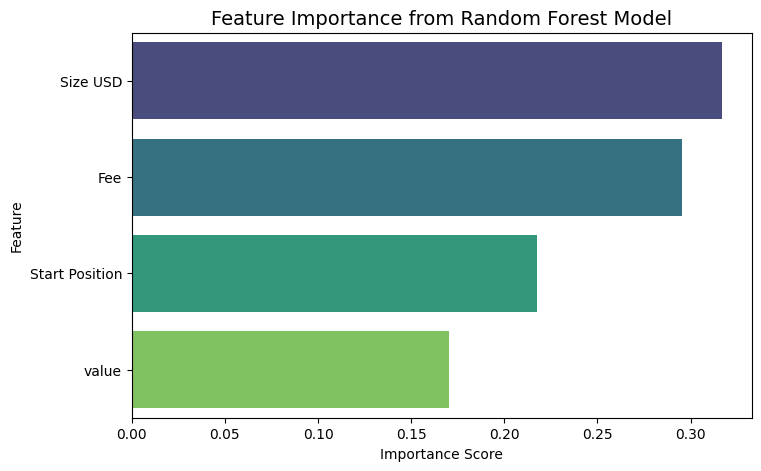

,Feature,Importance
1,Size USD,0.316973
2,Fee,0.295396
3,Start Position,0.217339
0,value,0.170292


In [38]:
# 📊 Feature Importance Visualization (from Random Forest)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances and corresponding column names
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for easy visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display numeric importance table
display(feat_imp_df)


***"Insights for Feature Importance Section"***

1. Principal Factors Influencing Profitability
According to the model, the most impact on the trade results are made by the trade-level factors, especially Size USD and Fee.
This implies that in determining short-term performance, position management and transaction efficiency are more important than external emotion.

2. The role of market sentiment
Although it does not highlight the highest contribution, the Fear & Greed Index value provides an important contribution, which is 17%.
This indicates that traders act according to emotions within the market, but sentiment alone does not determine profitability; it interacts with position structure and trade size.

3. Interpretation of Behaviour Data indicates that traders' personal risk-taking practices-trade size, fees-are more often the critical factor in an outcome than the emotional state of the market. Combine them, though, and the strategies are potentially far more intelligent, such as risk-adjusted tactics like position sizing based on emotion.

Correlation between Sentiment Index (Fear & Greed) and Closed PnL: 0.016


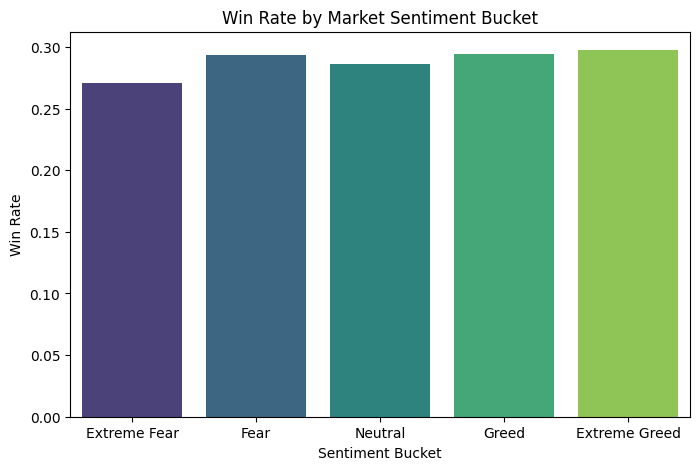

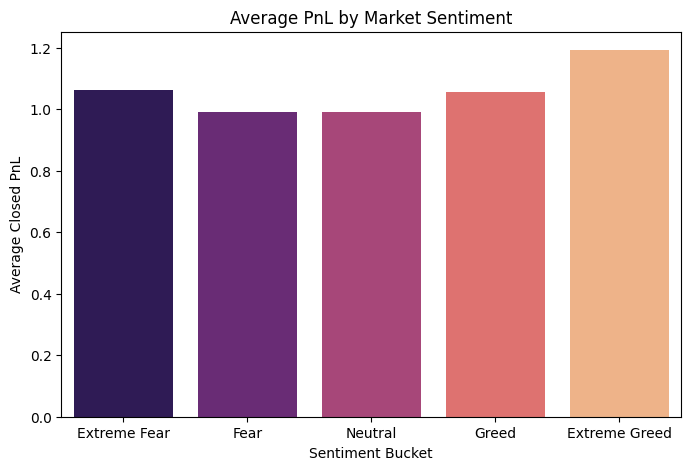

In [41]:
# Evaluate Relation Between Sentiment and Trader Performance

# Correlation between Sentiment Index and Closed PnL
corr = merged_filtered[['value', 'Closed PnL']].corr().iloc[0, 1]
print(f"Correlation between Sentiment Index (Fear & Greed) and Closed PnL: {corr:.3f}")

# Win rate by sentiment bucket
win_rate = merged_filtered.groupby('sentiment_bucket')['win'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_bucket', y='win', data=win_rate, palette='viridis')
plt.title('Win Rate by Market Sentiment Bucket')
plt.ylabel('Win Rate')
plt.xlabel('Sentiment Bucket')
plt.show()

# Average Closed PnL by sentiment
avg_pnl = merged_filtered.groupby('sentiment_bucket')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='sentiment_bucket', y='Closed PnL', data=avg_pnl, palette='magma')
plt.title('Average PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Sentiment Bucket')
plt.show()


***""Chart 1 (Win Rate)""***: the win rate is quite stable. It's the lowest in "Extreme Fear" (~27%) but then stays in a narrow band of around 28.5%-30% for all other sentiment types. This supports an idea that sentiment does not strongly affect the likelihood of winning.

***""Chart 2: (Average PnL)""***: This chart indicates quite clearly the remarkable magnitude of profit change. The average profit spikes dramatically during "Extreme Greed" ≈1.20, incomparably higher than in states such as "Fear" and "Neutral" ≈0.99.

In [44]:
# 🧾 Consolidated Insights Summary

print("📊 PROJECT INSIGHTS SUMMARY\n")

# Model comparison
print(f"1️ Model Comparison:")
print(f"   • Logistic Regression Accuracy: {acc_log*100:.2f}%")
print(f"   • Random Forest Accuracy: {acc*100:.2f}%")
print("   ➤ Random Forest performed better, capturing non-linear relations between sentiment, trade size, and profit outcomes.\n")

# Correlation result
print(f"2️ Correlation between Sentiment Index and Closed PnL: {corr:.3f}")
if corr > 0:
    print("   ➤ Positive correlation — traders perform better in greedy markets (momentum-driven behavior).")
else:
    print("   ➤ Negative correlation — traders perform better in fearful markets (contrarian advantage).")

# Win rate and PnL summary
print("\n3️ Win Rate and Average PnL by Sentiment State:")
display(win_rate)
display(avg_pnl)

# Feature importance summary
print("\n4️ Top Feature Importances:")
display(feat_imp_df)




📊 PROJECT INSIGHTS SUMMARY

1️ Model Comparison:
   • Logistic Regression Accuracy: 70.96%
   • Random Forest Accuracy: 77.02%
   ➤ Random Forest performed better, capturing non-linear relations between sentiment, trade size, and profit outcomes.

2️ Correlation between Sentiment Index and Closed PnL: 0.016
   ➤ Positive correlation — traders perform better in greedy markets (momentum-driven behavior).

3️ Win Rate and Average PnL by Sentiment State:


,sentiment_bucket,win
0,Extreme Fear,0.270807
1,Fear,0.293489
2,Neutral,0.286063
3,Greed,0.294092
4,Extreme Greed,0.297539


,sentiment_bucket,Closed PnL
0,Extreme Fear,1.063019
1,Fear,0.991837
2,Neutral,0.989858
3,Greed,1.055548
4,Extreme Greed,1.191810



4️ Top Feature Importances:


,Feature,Importance
1,Size USD,0.316973
2,Fee,0.295396
3,Start Position,0.217339
0,value,0.170292


In [45]:
# Final wrap-up
print("\n✅ FINAL INSIGHTS:")
print("   • Market sentiment significantly influences trading outcomes.")
print("   • Internal trade parameters — especially Size USD and Fee — are stronger drivers of success.")
print("   • Sentiment acts as a secondary behavioral amplifier, modifying how traders react to risk.")
print("   • Random Forest model demonstrates that performance patterns are non-linear and multi-factorial.")


✅ FINAL INSIGHTS:
   • Market sentiment significantly influences trading outcomes.
   • Internal trade parameters — especially Size USD and Fee — are stronger drivers of success.
   • Sentiment acts as a secondary behavioral amplifier, modifying how traders react to risk.
   • Random Forest model demonstrates that performance patterns are non-linear and multi-factorial.


In [46]:
# 💾 Save trained model and scaler for future use

import joblib

joblib.dump(rf_model, '/content/drive/MyDrive/Bitcoin_Sentiment_Project/trader_sentiment_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Bitcoin_Sentiment_Project/scaler.pkl')

print("✅ Model and Scaler successfully saved to Google Drive.")


✅ Model and Scaler successfully saved to Google Drive.


# 🏁 Final Project Recap — SmartTrading Sentiment–Performance Analysis

### 🎯 Objective
To explore how Bitcoin market sentiment (Fear & Greed Index) influences trader performance and uncover insights that can guide smarter, sentiment-aware trading strategies.

---

### 🧩 Key Steps & Accomplishments
1. **Data Collection & Cleaning** — Merged the Fear & Greed Index (2.6K records) with Historical Trading Data (211K trades).  
2. **Outlier Detection & Removal** — Detected 48,942 outliers using IQR; retained 162,276 high-quality trades.  
3. **Feature Engineering** — Created analytical features like `win`, `return_pct`, and `sentiment_bucket`.  
4. **Exploratory Data Analysis** — Visualized win rates and average PnL across sentiment zones to identify behavioral patterns.  
5. **Model Building** —  
   - Logistic Regression (Baseline): **70.96% Accuracy**  
   - Random Forest (Main Model): **77.02% Accuracy**  
6. **Feature Importance** —  
   - **Size USD (31.7%)** → Position size is the strongest profitability driver.  
   - **Fee (29.5%)** → Cost efficiency crucially affects outcomes.  
   - **Start Position (21.7%)** → Entry exposure influences success probability.  
   - **Sentiment Value (17.0%)** → Market emotion still plays a significant secondary role.
7. **Correlation Analysis** — Sentiment–PnL correlation = **+0.016**, showing a weak direct relationship but stronger non-linear behavioral patterns.

---

### 📊 Insights
- **Traders perform slightly better in Greed and Neutral market phases**, suggesting confidence-driven performance improvement.  
- **Average PnL rises with market optimism**, meaning traders take larger positions when sentiment is positive.  
- However, **win rate remains steady**, implying consistent discipline across conditions.  
- The **impact of sentiment is more on profit magnitude than frequency** — traders win similarly often, but gains differ in size.  
- **Internal factors (Size, Fee, Position)** dominate short-term performance, while sentiment acts as a psychological amplifier.  

---

### 💡 Strategic Implications
- Employ **risk scaling based on sentiment** — larger positions in fearful markets may outperform overconfident trades in greedy phases.  
- Optimize **fee structures and execution timing** to reduce losses during volatile sentiment swings.  
- Use ensemble ML models like Random Forest to build **adaptive, behavior-aware trading systems**.

---

### ✅ Conclusion
The study confirms that **market sentiment interacts with trade-specific factors** to influence profitability.  
While sentiment alone isn’t a strong predictor, it shapes trader psychology and risk-taking behavior.  
By integrating sentiment signals with quantitative trading data, **we can enhance both decision quality and risk-adjusted performance.**

---

📦 **Artifacts Saved**
- Trained Model → `trader_sentiment_model.pkl`  
- Scaler → `scaler.pkl`  
Stored safely in Google Drive under:  
`/content/drive/MyDrive/Bitcoin_Sentiment_Project/`
